In [131]:
from os.path import commonprefix
from FAdo.reex import *
from FAdo.cfg import *
from FAdo.fa import *
import cProfile
%run _eTree_.ipynb

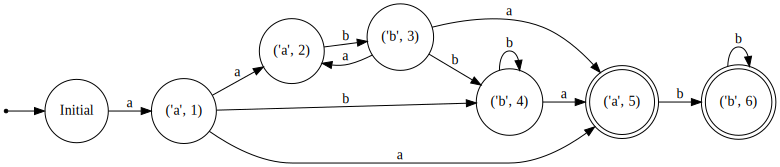

False


In [132]:
expr = "a(ab)*b*ab*"
a = str2regexp(expr)
a1 = a.nfaPosition()
a1.display(strict = True)
t = eTree(a)
n = t.root
print t.check_determinism(n)

1) Gerar expressão regular aleatória

In [133]:
%time op = reStringRGenerator(Sigma={"a","b","c","d","e"}, size=1000, cfgr=reGrammar["g_rpn"])
a1 = op.generate()
b1 = rpn2regexp(a1).reduced()
print "RegEx generated!"
b2 = b1.marked()

CPU times: user 3.78 s, sys: 28 ms, total: 3.81 s
Wall time: 3.8 s
RegEx generated!


2) Criar árvore e gerar FollowList da expressão e compara-la com FollowListsD do FAdo

In [134]:
b2 = b1.marked()
t = eTree(b1)
print "Tree done!"
n = t.root
l = n.First()
def cmp_Flist(t):
    d = t.root.exp.followListsD()
    k = t.followList()
    for x in k:
        x2 = x.exp
        for z in k[x]:
            if z.exp not in set(d[x2]):
                return False
    return True
print "Equal?",cmp_Flist(t)
print "Deterministic?",t.check_determinism(t.root)
#print t.root.exp.unmarked()

#a1 = b1.nfaPosition()
#a1 = b1.toDFA().display()
#a1.display(strict = True)

Tree done!
Equal? True
Deterministic? False


3) Comparar tempos de execução de FollowList e FollowListsD

In [25]:
%time t.followList()
cProfile.run("t.followList()")
%time b2.followListsD()
cProfile.run("b2.followListsD()")

CPU times: user 935 ms, sys: 8.01 ms, total: 943 ms
Wall time: 932 ms
         947073 function calls (812363 primitive calls) in 1.186 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.075    0.075    1.186    1.186 <ipython-input-22-2160078ae33f>:12(followList)
    67516    0.041    0.000    0.041    0.000 <ipython-input-22-5bb6fbfa7e03>:100(First)
    12091    0.007    0.000    0.007    0.000 <ipython-input-22-5bb6fbfa7e03>:109(Last)
215243/80533    0.206    0.000    0.221    0.000 <ipython-input-22-5bb6fbfa7e03>:117(LSA)
    82369    0.217    0.000    1.102    0.000 <ipython-input-22-5bb6fbfa7e03>:76(follow)
    20700    0.073    0.000    0.089    0.000 <ipython-input-22-5bb6fbfa7e03>:89(follow_concat)
    46816    0.147    0.000    0.180    0.000 <ipython-input-22-5bb6fbfa7e03>:94(follow_star)
        1    0.000    0.000    1.186    1.186 <string>:1(<module>)
    82369    0.309    0.000    0.369    0.000 ge

4) Testar FollowList para o exemplo de B.Groz e S.Manneth

In [12]:
e4 = str2regexp("((c*)((ab*)(a*c)))*(ba)")
t4 = eTree(e4)
k4 = t4.followList()
for x in k4:
    print x.exp,":"
    for y in k4[x]:
        print y.exp
    print "_________"

('a', 2) :
('c', 5)
('b', 3)
('a', 4)
_________
('a', 7) :
_________
('b', 6) :
('a', 7)
_________
('a', 4) :
('c', 5)
('a', 4)
_________
('b', 3) :
('c', 5)
('b', 3)
('a', 4)
_________
('c', 5) :
('b', 6)
('a', 2)
('c', 1)
_________
('c', 1) :
('a', 2)
('c', 1)
_________


5) Testar BuildNext para exemplo anterior

In [102]:
e4 = str2regexp("((c*)((ab*)(a*c)))*(ba)")
t4 = eTree(e4)
print buildNext('a',t4.root,set())
for x in  t4.next:
    print "->",x.exp
    for y in t4.next[x]:
        print y.exp
    print "----------"

ta = t4.build_ta("b")
print t4.root.FirstPos(ta)

True
-> (('c', 1)* ((('a', 2) ('b', 3)*) (('a', 4)* ('c', 5))))* (('b', 6) ('a', 7))
----------
set([<__main__.Node instance at 0x7fad42abdc68>])


In [136]:
e4 = str2regexp("((c*)((ab*)(a*c)))*(ba)*")
t4 = eTree(e4)
sigma = "a"
buildNext(sigma,t4.root,set())
#print checkNode(t4.root,sigma)
print t4.check_determinism(t4.root)

True


True
True


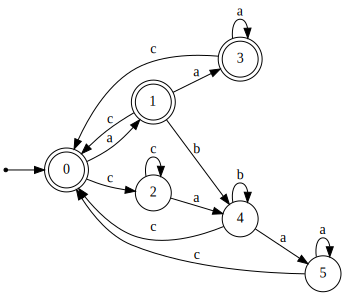

In [137]:
e5 = str2regexp("((c*)((ab*)(a*c)))*(a*a*)*")
t5 = eTree(e5)
sigma = "a"
print buildNext(sigma,t5.root,set())
print t5.check_determinism(t5.root)
a1 = e5.toDFA().display()
#a1.display(strict = True)

False


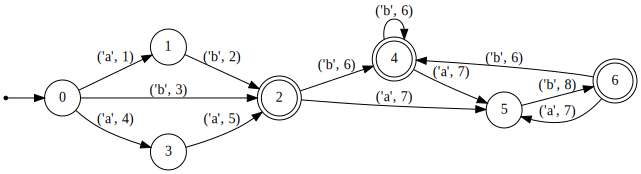

In [138]:
e6 = str2regexp("(ab+b+aa)(b*(ab)*)*")
t6 = eTree(e6)
print t6.check_determinism(t6.root)
e6.marked().toDFA().display()

True


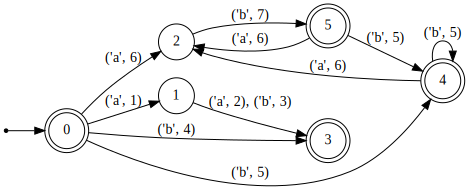

In [144]:
e7 = str2regexp("((a(a+b))+b)+(b*(ab)*)*")
t7 = eTree(e7)
print t7.check_determinism(t7.root)
e7.marked().toDFA().display()